In [21]:
pip install ucimlrepo

In [22]:
#importing the necessary libaries

from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [23]:
breastCancerWisconsinDiagnostic = fetch_ucirepo(id=17)

features = breastCancerWisconsinDiagnostic.data.features
target = breastCancerWisconsinDiagnostic.data.targets


In [24]:
target

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


#Preprocessing

In [25]:
#Transforming Malignant (M) to 1 and Benign to 0
target.loc[:, 'Diagnosis'] = np.where((target.iloc[:, 0] == 'M'), 1, 0)
target

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [26]:
features

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
print("valores unicos no target:", np.unique(target))
if isinstance(target, pd.DataFrame):
    target = target.values

threshold = target.mean()
target = np.where(target > threshold, 1, 0)


if target.ndim > 1 and target.shape[1] == 1:
    target = target.ravel()
target

valores unicos no target: [0 1]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

#Split the dataset into training and testing sets

In [28]:
atributoTraining, atributoTest, alvoTraining, alvoTest = train_test_split(features, target, test_size=50, random_state=40, stratify=target)

#Training a decision tree model
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(atributoTraining, alvoTraining)

DecisionTreeClassifier(random_state=40)

In [29]:
atributoPredDTree = dtree.predict(atributoTest)
accuracyDecisionTree = dtree.score(atributoTest, alvoTest)
print(f"Accuracy of the decision tree: {accuracyDecisionTree*100:.2f} %")
precisionDtree = precision_score(alvoTest, atributoPredDTree, pos_label=True)
print(f"Precision of the Decision Tree model: {precisionDtree*100:.2f} %")


Accuracy of the decision tree: 86.00 %
Precision of the Decision Tree model: 77.27 %


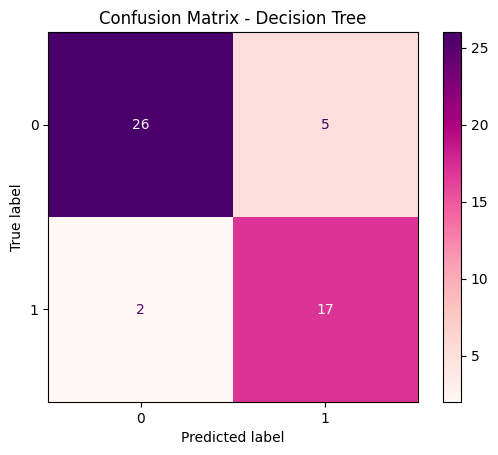

In [30]:
confusionMatrixDT = confusion_matrix(alvoTest, atributoPredDTree)
dispDtree = ConfusionMatrixDisplay(confusion_matrix=confusionMatrixDT, display_labels=dtree.classes_)
dispDtree.plot( cmap=plt.cm.RdPu)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#Random Forest Classifier
Training a random forest model

In [31]:
rf = RandomForestClassifier()
rf.fit(atributoTraining, alvoTraining)
atributoPred = rf.predict(atributoTest)
atributoTraining

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
334,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,13.350,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.037090,0.022300,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.1584,0.07065,...,11.050,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468
143,12.900,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.030880,0.1778,0.06235,...,14.480,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118
531,11.670,20.02,75.21,416.2,0.10160,0.09453,0.042000,0.021570,0.1859,0.06461,...,13.350,28.81,87.00,550.6,0.1550,0.29640,0.27580,0.08120,0.3206,0.08950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,0.06284,...,18.230,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.026450,0.2540,0.06087,...,14.160,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,...,28.400,28.01,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.53810,0.07879,0.3322,0.14860


In [32]:
atributoPredRF = rf.predict(atributoTest)

accuracyRandomFlorest = rf.score(atributoTest, alvoTest)
print(f"Accuracy of the random forest: {accuracyRandomFlorest*100:.2f} %")

precisionRF = precision_score(alvoTest, atributoPredRF, pos_label=True,zero_division=0)

print(f"Precision of the random forest : {precisionRF*100:.2f} %")


Accuracy of the random forest: 90.00 %
Precision of the random forest : 85.00 %


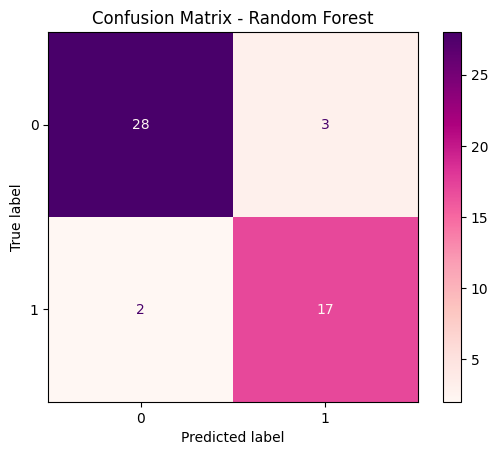

In [33]:
confusionMatrixDT = confusion_matrix(alvoTest, atributoPred)
dispRf = ConfusionMatrixDisplay(confusion_matrix=confusionMatrixDT, display_labels=rf.classes_)
dispRf.plot( cmap=plt.cm.RdPu)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Comparison between the Decision Tree and the Random Forest algorithm


The random forest model performs better overall compared to the decision tree. it has fewer false positives and more true negatives, leading to higher accurancy and precicion


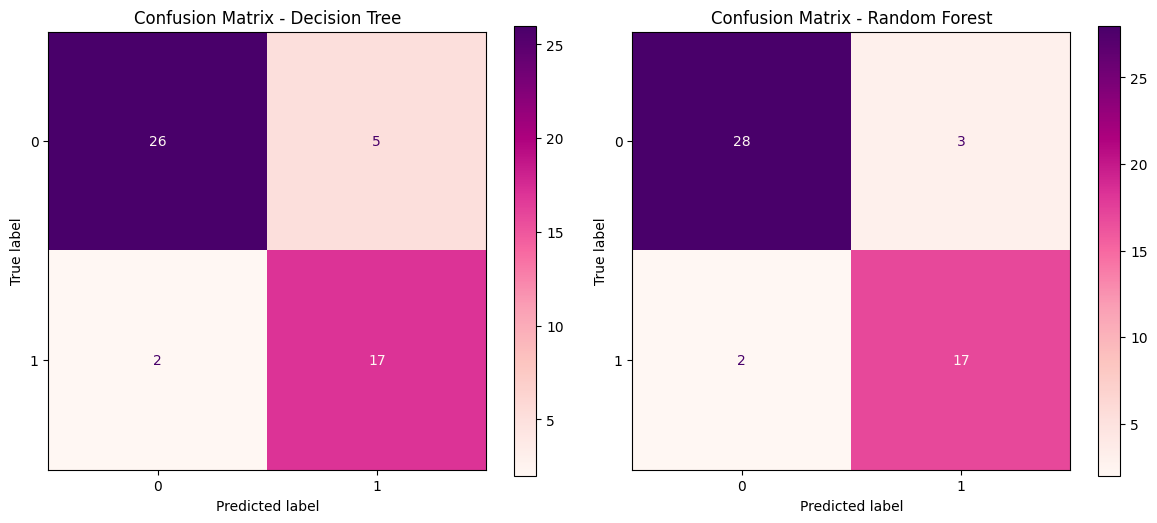

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

dispDtree.plot(ax=axes[0], cmap=plt.cm.RdPu)
axes[0].set_title("Confusion Matrix - Decision Tree")

dispRf.plot(ax=axes[1], cmap=plt.cm.RdPu)
axes[1].set_title("Confusion Matrix - Random Forest")

plt.tight_layout()
plt.show()